## Importing Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
#from utils import *

from sklearn import linear_model, utils, svm
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Imported Text extraction and Cleanup as a python file
!cp /content/drive/MyDrive/NLP/TextExtractionCleanUP.py /content

In [6]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import TextExtractionCleanUP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Train Test Split

In [8]:
df = pd.read_csv("/content/Final_hate.csv")
df

,Unnamed: 0,Text,label
0,0,RT @MailOnline: The Nazi death gas so horrific...,0
1,1,Carlos Correa had gyalchester as his walkup mu...,0
2,2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0
3,3,RT @HeeeyMonica: Papaya has to be the worst fr...,0
4,4,@Pineaqples @DenialEsports btw I watched where...,0
...,...,...,...
103216,103216,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0
103217,103217,"you've gone and broke the wrong heart baby, an...",0
103218,103218,young buck wanna eat!!.. dat nigguh like I ain...,0
103219,103219,youu got wild bitches tellin you lies,0


In [9]:
c = df.columns
c

Index(['Unnamed: 0', 'Text', 'label'], dtype='object')

In [10]:
train = df['Text']
test = df['label']

In [11]:
# set aside 20% of train and test data for evaluation
X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, shuffle = True, random_state = 8)


print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))


print("========================")

# Use the same function above for the validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (82576,)
X_val shape: (20645,)
y_train shape: (82576,)
y_val shape: (20645,)
X_train shape: (61932,)
y_train shape: (61932,)
X_test shape: (20644,)
y_test shape: (20644,)


In [12]:
X_train.to_frame()
y_train.to_frame()
# Making Training Data 
trainingData = pd.concat([X_train, y_train], axis=1, join='inner')
trainingData

,Text,label
10461,@TMobileHelp Friend of mine in Hampton GA next...,0
23652,What a Rhode Island Teen Wants You to Know Abo...,0
47078,1825 Capped Bust Half Dollar 50C - PCGS XF45 (...,0
82652,"@NFLBadwitch bitch please. Don't get shot, Dou...",0
23789,A Look Back at America’s Challenges and Ahead ...,0
...,...,...
85668,@uhCokee he's just a cunt and nobody likes him...,0
72142,.@eaballesty @tim_geelen Who would I link to f...,0
4898,Congrats @Dan_Norton4 well deserved!! One of t...,0
87450,Everyone that says #LetsMakeItAwkward is a que...,0


In [13]:
X_train

10461    @TMobileHelp Friend of mine in Hampton GA next...
23652    What a Rhode Island Teen Wants You to Know Abo...
47078    1825 Capped Bust Half Dollar 50C - PCGS XF45 (...
82652    @NFLBadwitch bitch please. Don't get shot, Dou...
23789    A Look Back at America’s Challenges and Ahead ...
                               ...                        
85668    @uhCokee he's just a cunt and nobody likes him...
72142    .@eaballesty @tim_geelen Who would I link to f...
4898     Congrats @Dan_Norton4 well deserved!! One of t...
87450    Everyone that says #LetsMakeItAwkward is a que...
41547    @ThandoKM He's showing us the middle finger. H...
Name: Text, Length: 61932, dtype: object

In [14]:
x = trainingData.groupby('label').size()
x

label
0    54543
1     7389
dtype: int64

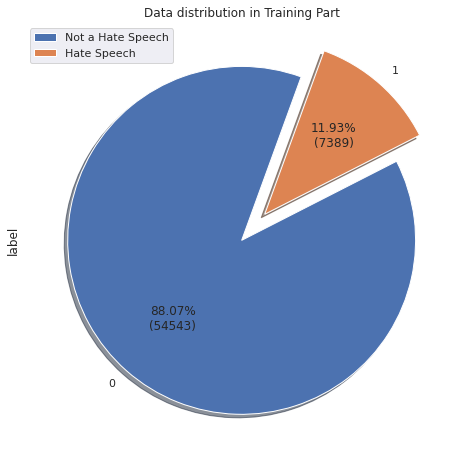

In [15]:
import seaborn as sns
x = trainingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution in Training Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

## Training Part (PreProcess)

In [16]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
# Pre-Processing
trainingData['Text'] = trainingData['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))
TextExtractionCleanUP.preprocessing_method(trainingData,'Text')
TextExtractionCleanUP.spellCheck(trainingData,'Text')
trainingData['Text'] = trainingData['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)
trainingData['Text2'] = trainingData.Text.apply(lambda x: str(x)[1:-1]) 
trainingData


,Text,label,Text2
10461,"[friend, mine, ton, ga, next, speedway, cannot...",0,"'friend', 'mine', 'ton', 'ga', 'next', 'speedw..."
23652,"[rhode, island, teen, want, know, year, middle...",0,"'rhode', 'island', 'teen', 'want', 'know', 'ye..."
47078,"[capped, bust, half, dollar, 50c, pig, xf45, e...",0,"'capped', 'bust', 'half', 'dollar', '50c', 'pi..."
82652,"[bitch, please, dont, get, shot, doug]",0,"'bitch', 'please', 'dont', 'get', 'shot', 'doug'"
23789,"[look, back, america, challenge, ahead, hopefu...",0,"'look', 'back', 'america', 'challenge', 'ahead..."
...,...,...,...
85668,"[count, nobody, like, choke, shit]",0,"'count', 'nobody', 'like', 'choke', 'shit'"
72142,"[would, link, study, afm]",0,"'would', 'link', 'study', 'afm'"
4898,"[congrats, well, deserved, one, best, 7, playe...",0,"'congrats', 'well', 'deserved', 'one', 'best',..."
87450,"[everyone, say, letsmakeitawkward, queer, just...",0,"'everyone', 'say', 'letsmakeitawkward', 'queer..."


In [18]:
X_train = trainingData['Text2']
y_train = trainingData['label']

In [19]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (61932,)
y_train shape: (61932,)
X_test shape: (20644,)
y_test shape: (20644,)


##Testing Part (PreProcess)

In [20]:
# Now pre processing testing data
testingData = pd.concat([X_test, y_test], axis=1, join='inner')
testingData

,Text,label
73340,:face_blowing_a_kiss:,0
79601,&#8220;@Caiivs: On some real shit if I catch t...,0
51712,@MSNBC @maddow,1
42148,I added a video to a @YouTube playlist Win A ...,0
67645,@coopatropp randi@randi.io,0
...,...,...
20640,@SarahAnDerRuhr @RichardSHarmon @lnmuir Richar...,0
42488,The updates appear to all be cosmetic and prim...,0
62160,@ENDSexAbuseNOW Who is to blame for that?,0
61660,@fee_bee_63: Kat is a completely rank cow but ...,0


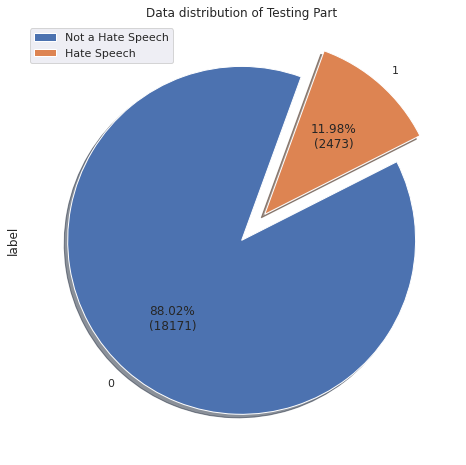

In [21]:
x = testingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution of Testing Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

In [22]:
# Expansion of short form words
testingData['Text'] = testingData['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))
TextExtractionCleanUP.preprocessing_method(testingData,'Text')
# SpellCheck
TextExtractionCleanUP.spellCheck(testingData,'Text')
# Lemmetize and tokenize
testingData['Text'] = testingData['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)
testingData['Text2'] = testingData.Text.apply(lambda x: str(x)[1:-1]) 
testingData

,Text,label,Text2
73340,[face_blowing_a_kiss],0,'face_blowing_a_kiss'
79601,"[real, shit, catch, bitch, game, on8221]",0,"'real', 'shit', 'catch', 'bitch', 'game', 'on8..."
51712,[],1,
42148,"[added, video, playlist, win, trip, star, war,...",0,"'added', 'video', 'playlist', 'win', 'trip', '..."
67645,[randiio],0,'randiio'
...,...,...,...
20640,"[richard, amazing, talent, make, u, feel, exac...",0,"'richard', 'amazing', 'talent', 'make', 'u', '..."
42488,"[update, appear, cosmetic, primarily, confined...",0,"'update', 'appear', 'cosmetic', 'primarily', '..."
62160,[blame],0,'blame'
61660,"[kat, completely, rank, cow, god, annie, annoy...",0,"'kat', 'completely', 'rank', 'cow', 'god', 'an..."


In [23]:
X_test = testingData['Text2']
y_test = testingData['label']

In [25]:
X_test

73340                                'face_blowing_a_kiss'
79601    'real', 'shit', 'catch', 'bitch', 'game', 'on8...
51712                                                     
42148    'added', 'video', 'playlist', 'win', 'trip', '...
67645                                            'randiio'
                               ...                        
20640    'richard', 'amazing', 'talent', 'make', 'u', '...
42488    'update', 'appear', 'cosmetic', 'primarily', '...
62160                                              'blame'
61660    'kat', 'completely', 'rank', 'cow', 'god', 'an...
62704    'sexist', 'driver', 'would', 'drive', 'stop', ...
Name: Text2, Length: 20644, dtype: object

## Modeling

TF-IDF Vectorizer

In [26]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_train)
tfidf_val = vec.transform(X_test)

In [27]:
print(tfidf_tr.shape,tfidf_val.shape)

(61932, 52944) (20644, 52944)


In [28]:
print(tfidf_val)

  (0, 16984)	1.0
  (1, 42072)	0.2915427312365346
  (1, 38340)	0.3456750471311509
  (1, 33740)	0.6793596116481384
  (1, 19407)	0.3219590120753789
  (1, 9299)	0.43164344385404607
  (1, 6956)	0.2097819049312252
  (3, 51354)	0.2542975627169736
  (3, 50424)	0.2948209939403746
  (3, 49891)	0.2399548251167816
  (3, 48013)	0.3400638210189212
  (3, 44297)	0.3135764914722437
  (3, 36007)	0.32956368220787297
  (3, 16761)	0.32224050980537366
  (3, 16160)	0.3164670013442298
  (3, 9450)	0.4059372468711552
  (3, 2832)	0.31539469959747174
  (4, 38125)	1.0
  (5, 52214)	0.35966192082579546
  (5, 41857)	0.43077324763091335
  (5, 21224)	0.36026376637320173
  (5, 20621)	0.44544985464107956
  (5, 17302)	0.3269278085378792
  (5, 6480)	0.4999803650913413
  (6, 50544)	0.2687973097198753
  :	:
  (20640, 16859)	0.3948185847741388
  (20640, 11694)	0.3608417703266197
  (20640, 11216)	0.4054860727837353
  (20640, 4403)	0.3411656380688211
  (20641, 7197)	1.0
  (20642, 50609)	0.17041299196617302
  (20642, 48793)	0.33

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, average_precision_score, confusion_matrix, roc_auc_score
from tqdm import tqdm
import re
import nltk
from nltk.stem.porter import PorterStemmer
from textblob import Word
import datetime
import pandas as pd
import requests
import sys
sys.path.append("../py")

import gensim
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_y_hat))

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    # Find True Positive
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    # Find False Negative
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)


## Machine Learning Models

In [39]:
from sklearn.metrics import classification_report

MultiNomial Naive Bayes

In [43]:
nb = MultinomialNB()
nb.fit(tfidf_tr, y_train)
y_pr_nb_val = nb.predict(tfidf_val)
print(classification_report(y_test, y_pr_nb_val))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     18171
           1       0.97      0.01      0.03      2473

    accuracy                           0.88     20644
   macro avg       0.93      0.51      0.48     20644
weighted avg       0.89      0.88      0.83     20644



Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_train)
y_pr_rf_val = rf.predict(tfidf_val)
print(classification_report(y_test, y_pr_rf_val))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18171
           1       0.83      0.39      0.53      2473

    accuracy                           0.92     20644
   macro avg       0.87      0.69      0.74     20644
weighted avg       0.91      0.92      0.90     20644



AdaBoost Classifier

In [48]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200).fit(tfidf_tr, y_train)
y_pr_abc_val = abc.predict(tfidf_val)
print(classification_report(y_test, y_pr_abc_val))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18171
           1       0.70      0.38      0.49      2473

    accuracy                           0.91     20644
   macro avg       0.81      0.68      0.72     20644
weighted avg       0.89      0.91      0.89     20644



Gradient Boosting

In [49]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_train)
y_pr_gbc_val = gbc.predict(tfidf_val)
print(classification_report(y_test, y_pr_gbc_val))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18171
           1       0.78      0.32      0.46      2473

    accuracy                           0.91     20644
   macro avg       0.85      0.66      0.70     20644
weighted avg       0.90      0.91      0.89     20644



Linear SVC

In [50]:
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_train)
y_pr_svc_val = svc.predict(tfidf_val)
print(classification_report(y_test, y_pr_svc_val))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     18171
           1       0.72      0.45      0.56      2473

    accuracy                           0.91     20644
   macro avg       0.82      0.72      0.75     20644
weighted avg       0.90      0.91      0.90     20644



## Plotting

In [51]:
data = {'Accuracy': [accuracy(y_test, y_pr_nb_val), 
                     accuracy(y_test, y_pr_rf_val), 
                     accuracy(y_test, y_pr_svc_val),
                     accuracy(y_test, y_pr_abc_val),
                     accuracy(y_test, y_pr_gbc_val)],
        'F1 Score': [f1(y_test, y_pr_nb_val), 
                     f1(y_test, y_pr_rf_val), 
                     f1(y_test, y_pr_svc_val),
                     f1(y_test, y_pr_abc_val),
                     f1(y_test, y_pr_gbc_val)],
        'Recall': [recall(y_test, y_pr_nb_val), 
                   recall(y_test, y_pr_rf_val), 
                   recall(y_test, y_pr_svc_val),
                   recall(y_test, y_pr_abc_val),
                   recall(y_test, y_pr_gbc_val)],
        'Precision': [precision(y_test, y_pr_nb_val), 
                      precision(y_test, y_pr_rf_val), 
                      precision(y_test, y_pr_svc_val),
                      precision(y_test, y_pr_abc_val),
                      precision(y_test, y_pr_gbc_val)]}
output = pd.DataFrame(data=data, index = ['Multinomial Naive Bayes', 
                                           'Random Forest',
                                           'Support Vector Machine', 
                                           'AdaBoost Classifier', 
                                           'Gradient Boosting Classifier'])

In [52]:
# DataSet - Founta, Warner, Waseem, Hasoc, Labeled Data
output.to_csv("OutputWithNormalParamters.csv")
output

,Accuracy,F1 Score,Recall,Precision
Multinomial Naive Bayes,0.881806,0.027113,0.013748,0.971429
Random Forest,0.917555,0.534209,0.394662,0.826418
Support Vector Machine,0.913340,0.557069,0.454913,0.718391
AdaBoost Classifier,0.906268,0.493057,0.380510,0.700149
Gradient Boosting Classifier,0.907721,0.455870,0.322685,0.776265


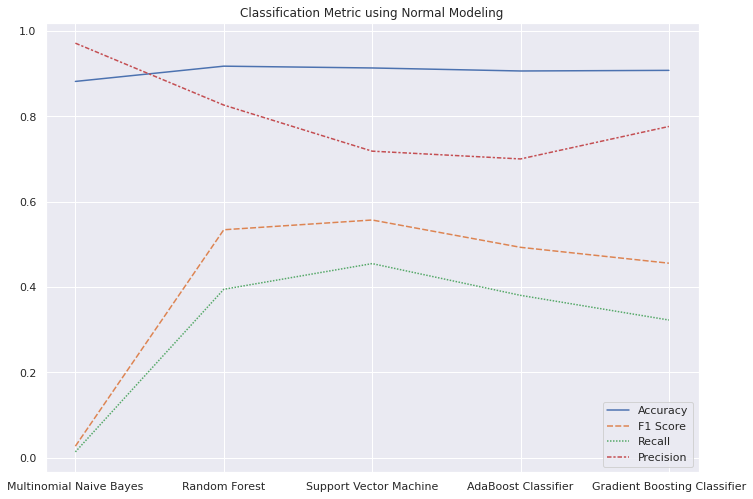

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Classification Metric using Normal Modeling")
sns.lineplot(data=output)